In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv ("C:\\Users\\SWAGA\\Downloads\\text_5_descr_celeba.csv")

# Print dataset info
print("✅ Dataset Loaded!")
print(df.head())  # Show first few rows
print("Dataset shape:", df.shape)


✅ Dataset Loaded!
     image_id                                   text_description
0  000001.jpg  The lady has pretty high cheekbones. Her hair ...
1  000002.jpg  The lady has pretty high cheekbones. She has b...
2  000003.jpg  His hair is wavy. He has big lips, narrow eyes...
3  000004.jpg  Her hair is straight. She has a pointy nose. T...
4  000005.jpg  She has arched eyebrows, big lips, narrow eyes...
Dataset shape: (50000, 2)


In [4]:
import os
image_folder = "C:\\Users\\SWAGA\\Downloads\\Images"  # Update with correct folder

# Check if images exist
image_ids = df["image_id"].values[:5]
for img_id in image_ids:
    img_path = os.path.join(image_folder, img_id)
    print(f"Checking: {img_path}")
    print("✅ Exists" if os.path.exists(img_path) else "❌ Missing")
import os

image_folder = "C:\\Users\\SWAGA\\Downloads\\Images"  # Update if needed

# List all files in the folder
all_files = os.listdir(image_folder)

print("Files in the folder:", all_files[:10])  # Show first 10 files



Checking: C:\Users\SWAGA\Downloads\Images\000001.jpg
✅ Exists
Checking: C:\Users\SWAGA\Downloads\Images\000002.jpg
❌ Missing
Checking: C:\Users\SWAGA\Downloads\Images\000003.jpg
❌ Missing
Checking: C:\Users\SWAGA\Downloads\Images\000004.jpg
❌ Missing
Checking: C:\Users\SWAGA\Downloads\Images\000005.jpg
❌ Missing
Files in the folder: ['000001.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000016.jpg', '000019.jpg', '000020.jpg', '000024.jpg', '000028.jpg']


In [5]:
import os

folder = "C:\\Users\\SWAGA\\Downloads\\Images"
files = sorted(os.listdir(folder))  # Sort files to rename in order

for i, file in enumerate(files):
    old_path = os.path.join(folder, file)
    new_name = f"{i+1:06d}.jpg"  # Format as '000001.jpg'
    new_path = os.path.join(folder, new_name)
    os.rename(old_path, new_path)
    print(f"Renamed {file} → {new_name}")


Renamed 000001.jpg → 000001.jpg
Renamed 000008.jpg → 000002.jpg
Renamed 000009.jpg → 000003.jpg
Renamed 000010.jpg → 000004.jpg
Renamed 000011.jpg → 000005.jpg
Renamed 000016.jpg → 000006.jpg
Renamed 000019.jpg → 000007.jpg
Renamed 000020.jpg → 000008.jpg
Renamed 000024.jpg → 000009.jpg
Renamed 000028.jpg → 000010.jpg
Renamed 000030.jpg → 000011.jpg
Renamed 000033.jpg → 000012.jpg
Renamed 000038.jpg → 000013.jpg
Renamed 000044.jpg → 000014.jpg
Renamed 000046.jpg → 000015.jpg
Renamed 000047.jpg → 000016.jpg
Renamed 000051.jpg → 000017.jpg
Renamed 000052.jpg → 000018.jpg
Renamed 000053.jpg → 000019.jpg
Renamed 000055.jpg → 000020.jpg
Renamed 000057.jpg → 000021.jpg
Renamed 000061.jpg → 000022.jpg
Renamed 000062.jpg → 000023.jpg
Renamed 000063.jpg → 000024.jpg
Renamed 000064.jpg → 000025.jpg
Renamed 000072.jpg → 000026.jpg
Renamed 000073.jpg → 000027.jpg
Renamed 000076.jpg → 000028.jpg
Renamed 000077.jpg → 000029.jpg
Renamed 000078.jpg → 000030.jpg
Renamed 000080.jpg → 000031.jpg
Renamed 

In [6]:
available_files = set(os.listdir("C:\\Users\\SWAGA\\Downloads\\Images"))
df = df[df["image_id"].isin(available_files)]  # Keep only existing images
print(f"Updated dataset size: {len(df)}")


Updated dataset size: 1526


✅ Total images successfully loaded: 1526
✅ Sample image shape: (128, 128, 3)


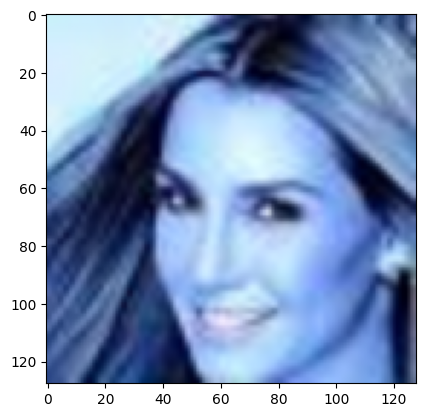

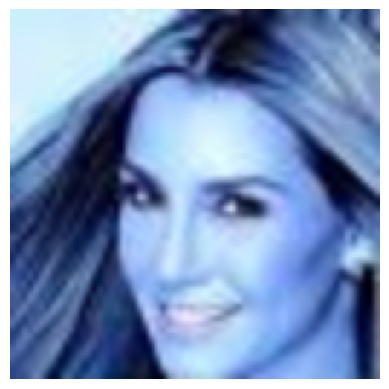

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt  # Add this at the beginning


# Set the correct folder path
image_folder = "C:\\Users\\SWAGA\\Downloads\\Images"

# Function to load images
def load_images(image_ids, image_folder, img_size=(128, 128)):
    images = []
    for img_id in image_ids:
        img_path = os.path.join(image_folder, img_id)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize
            img = img / 255.0  # Normalize
            images.append(img)
        else:
            print(f"⚠️ Could not load {img_id}")  # Print if any image fails to load
    return np.array(images)

# Load images
image_ids = df["image_id"].values  # Get updated image list
X = load_images(image_ids, image_folder)
print(f"✅ Total images successfully loaded: {len(X)}")

# Check if images loaded properly
if len(X) > 0:
    print("✅ Sample image shape:", X[0].shape)
    plt.imshow(X[0])
    plt.show()
plt.imshow(X[0])  # Show first image
plt.axis("off")  # Hide axes for better display
plt.show()


In [12]:
# Pass one image through the model to initialize it
model.predict(np.expand_dims(X_test[0], axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.5126846]], dtype=float32)

In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,177,349 (84.60 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,784,900 (56.40 MB)

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.5130 - loss: 0.8584 - val_accuracy: 0.5196 - val_loss: 0.6977
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.5362 - loss: 0.6905 - val_accuracy: 0.5229 - val_loss: 0.6924
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.5107 - loss: 0.6935 - val_accuracy: 0.5229 - val_loss: 0.6917
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - accuracy: 0.5109 - loss: 0.6937 - val_accuracy: 0.5163 - val_loss: 0.7014
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.5811 - loss: 0.6791 - val_accuracy: 0.5490 - val_loss: 0.6915
✅ Training completed!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
✅ Model has been reinitialized with an input!
🚀 Initializing model with a test image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


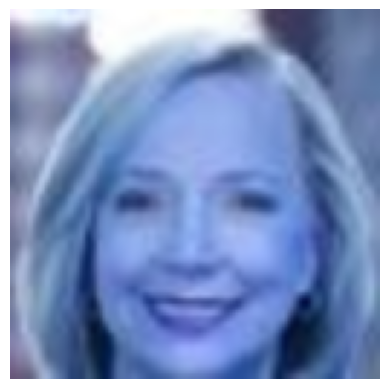

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
✅ Feature maps extracted!
Feature maps shape: [(1, 126, 126, 32), (1, 61, 61, 64)]


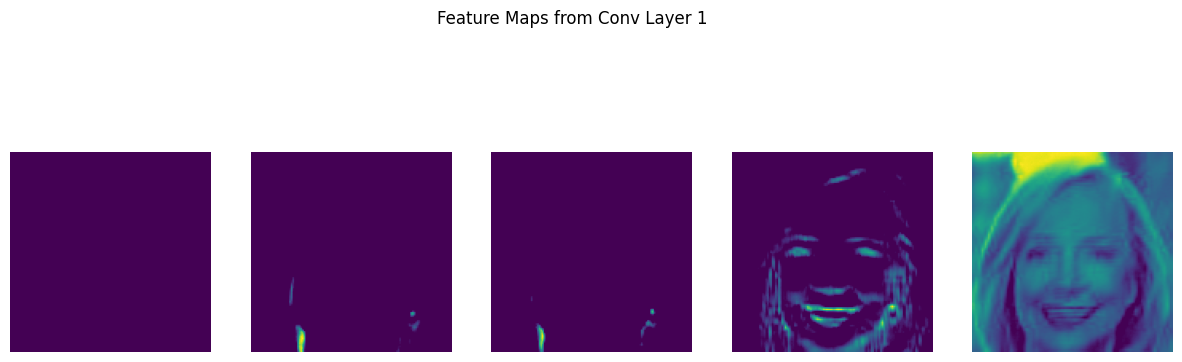

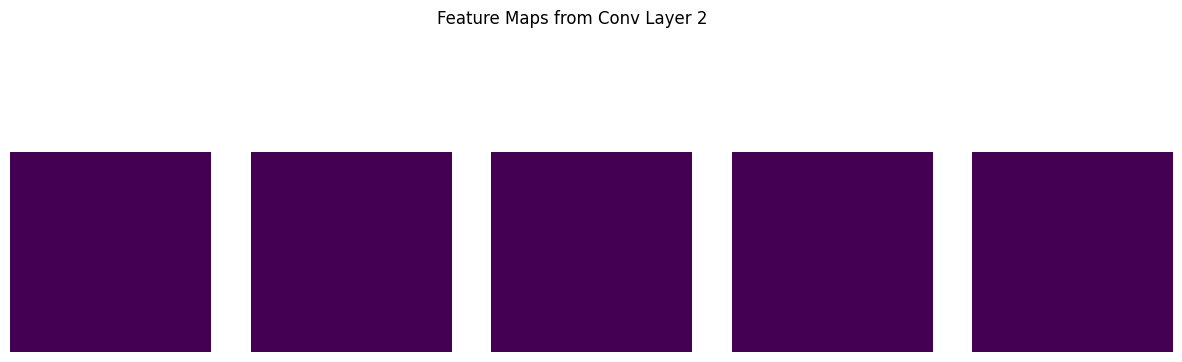

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Clear the previous model
tf.keras.backend.clear_session()

# Define a new CNN model using Functional API
input_layer = Input(shape=(128, 128, 3))
 
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create a proper model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
print("✅ Training completed!")

# Initialize the model with an input image
_ = model.predict(np.expand_dims(X_test[0], axis=0))
print("✅ Model has been reinitialized with an input!")
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize feature maps
def visualize_feature_maps(model, image):
    # Ensure the model is initialized
    _ = model.predict(np.expand_dims(image, axis=0))

    # Extract feature maps only from Conv2D layers
    conv_layers = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    
    # Create a model to extract feature maps (now it will work!)
    activation_model = Model(inputs=model.input, outputs=conv_layers)

    # Get activations for the input image
    image_input = np.expand_dims(image, axis=0)  # Ensure batch dimension
    activations = activation_model.predict(image_input)

    print("✅ Feature maps extracted!")
    print("Feature maps shape:", [act.shape for act in activations])  # Print feature map shapes

    # Plot feature maps for each convolutional layer
    for i, layer_activation in enumerate(activations):
        num_filters = layer_activation.shape[-1]  # Number of filters in the layer
        fig, axes = plt.subplots(1, min(5, num_filters), figsize=(15, 5))
        fig.suptitle(f"Feature Maps from Conv Layer {i+1}")
        
        for j, ax in enumerate(axes):
            ax.imshow(layer_activation[0, :, :, j], cmap='viridis')
            ax.axis('off')
        plt.show()

# Ensure model is initialized
print("🚀 Initializing model with a test image...")
_ = model.predict(np.expand_dims(X_test[0], axis=0))

# Show a test image before feature map visualization
plt.imshow(X_test[0])
plt.axis("off")
plt.show()

# Call the function
visualize_feature_maps(model, X_test[0])


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
✅ Feature maps extracted!
Feature maps shape: [(1, 126, 126, 32), (1, 61, 61, 64)]


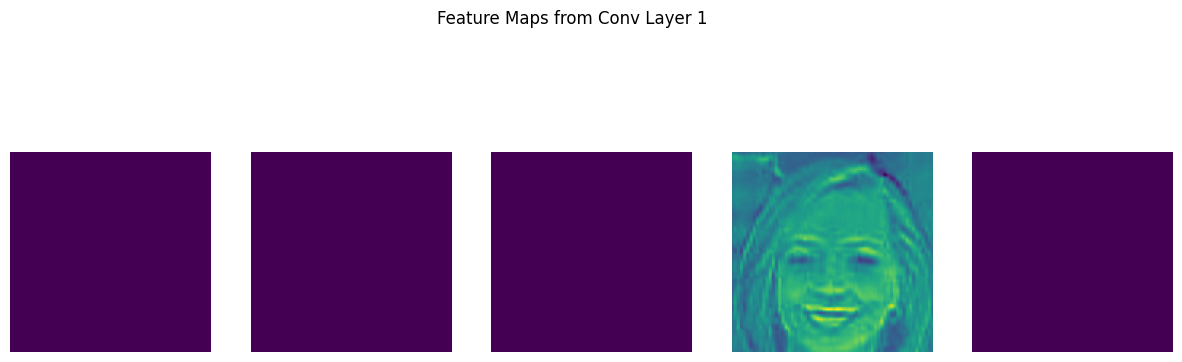

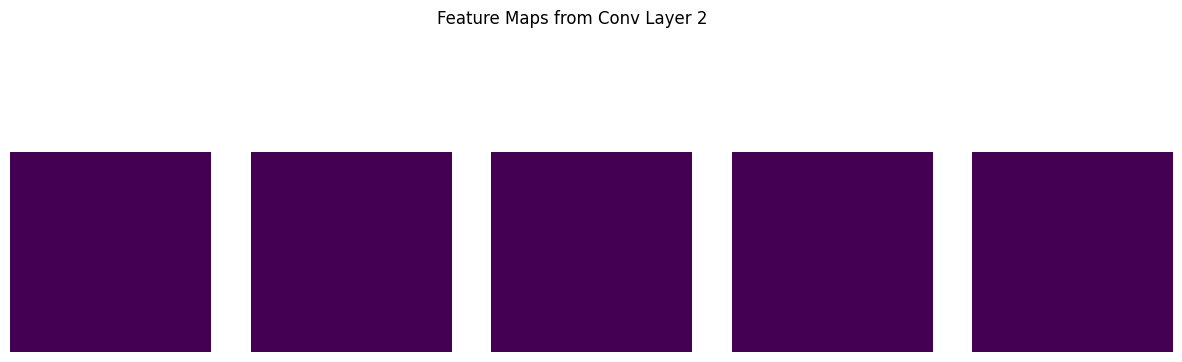

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
✅ Feature maps extracted!
Feature maps shape: [(1, 126, 126, 32), (1, 61, 61, 64)]


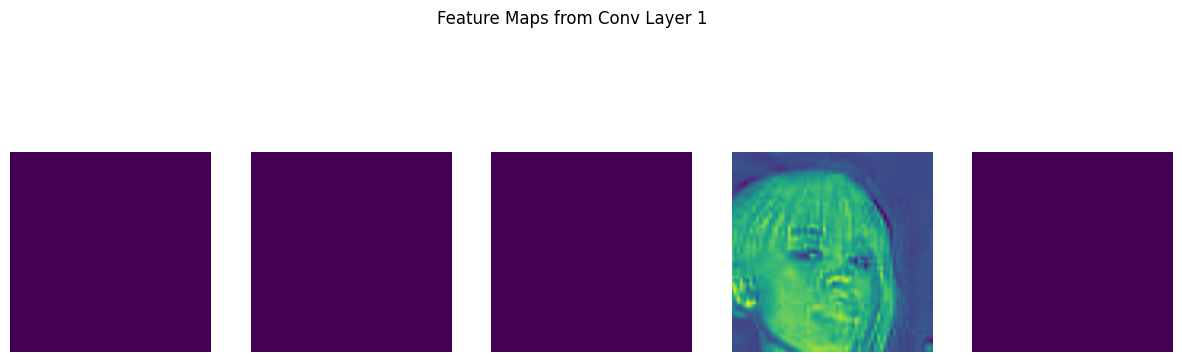

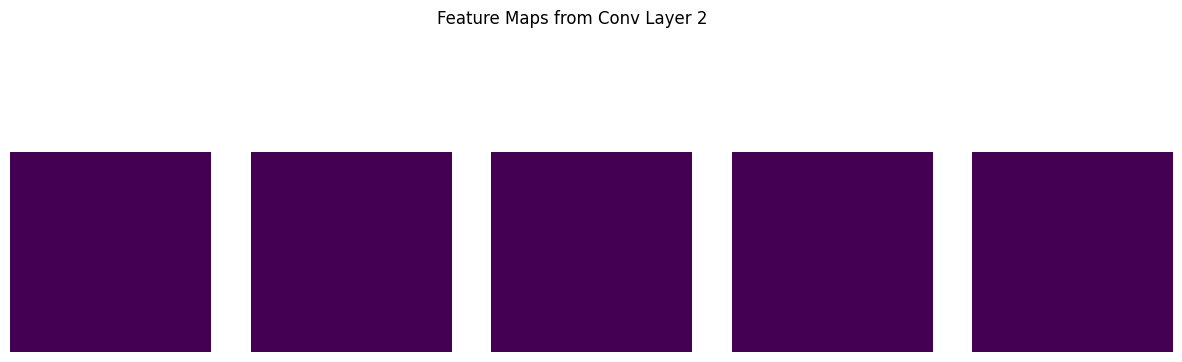

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.5052 - loss: 0.6935
Test Accuracy: 51.96%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
✅ Feature maps extracted!
Feature maps shape: [(1, 126, 126, 32), (1, 61, 61, 64)]


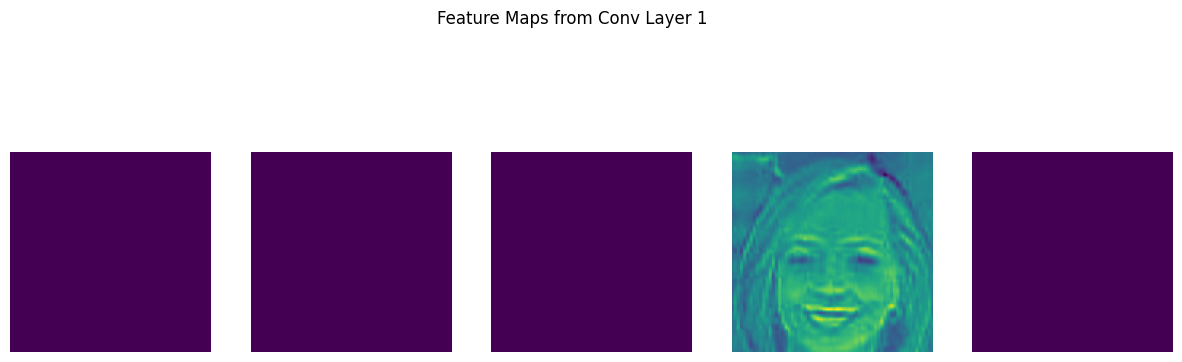

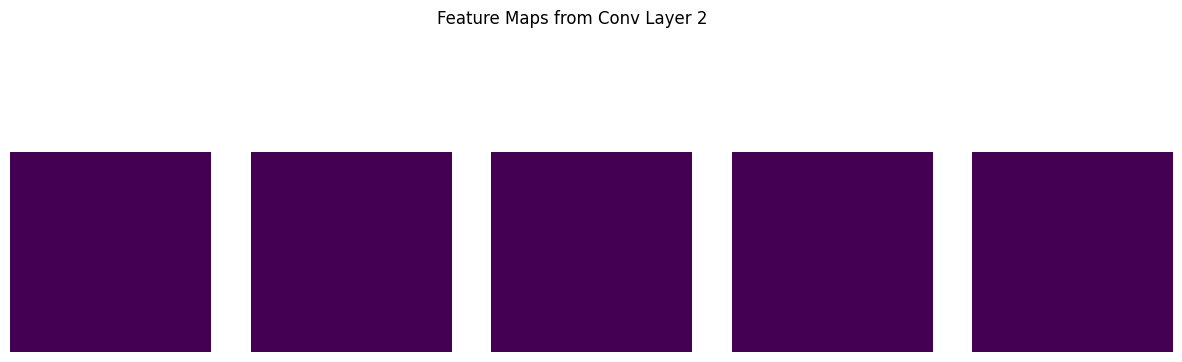

Epoch 1/10


ValueError: Unknown variable: <Variable path=conv2d/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[-9.35090929e-02  3.58241089e-02 -2.86658644e-03 -4.21140976e-02
    -1.06449187e-01  8.61592218e-02  8.11525881e-02 -1.38536409e-01
    -1.19062908e-01 -3.07267681e-02 -4.21753004e-02 -1.23388261e-01
    -1.08536087e-01  8.82622134e-03  1.17946543e-01 -3.74306254e-02
     2.22320165e-02  1.30575016e-01  7.69948214e-02  1.20978236e-01
    -3.24702375e-02 -6.62435889e-02  1.23049058e-01  7.27639720e-02
     1.15449257e-01 -4.16891538e-02 -6.79796934e-02 -1.52986795e-01
     3.51291522e-02  3.38646933e-03 -7.89166987e-02 -1.26158386e-01]
   [ 1.79340262e-02 -1.11135421e-02 -1.23816086e-02 -5.87429814e-02
    -2.90927012e-02  1.34881735e-01  5.65540791e-02  4.59567457e-02
     3.79286781e-02  6.62215427e-02 -2.94365771e-02 -1.83685720e-02
    -7.87839293e-02 -3.19981612e-02 -3.80487330e-02 -1.25049293e-01
    -1.22262808e-02  8.54910687e-02  1.06667094e-01  2.74989381e-02
    -1.07239550e-02 -7.90157393e-02 -8.75382051e-02 -1.09411426e-01
     2.86241528e-02 -2.07756534e-02  1.51935602e-02  1.58192217e-02
    -4.44435999e-02 -1.47674367e-01 -3.86834778e-02 -8.30050558e-02]
   [-1.95849650e-02 -6.67358413e-02 -4.15793136e-02  1.25036269e-01
     1.30356327e-01  7.77516188e-03 -9.69372690e-02  8.14034492e-02
    -4.01854888e-02 -5.43083623e-02  3.43994647e-02  7.33115524e-02
     3.18765803e-03 -4.28710245e-02  7.67326131e-02  2.56621502e-02
    -3.52506116e-02 -8.94329995e-02 -1.05350316e-01  9.47821364e-02
     8.80535785e-03 -3.82106863e-02  2.39617862e-02 -5.15625291e-02
    -5.31078801e-02  1.89571865e-02 -1.04626492e-01  2.97148097e-02
    -6.57438338e-02  1.11911841e-01  1.87040251e-02  4.16821949e-02]]

  [[ 3.62616926e-02 -7.11352825e-02  3.18846107e-02  4.51936312e-02
     7.17975423e-02 -2.97779124e-02  1.48723489e-02 -1.39358625e-01
    -1.43177629e-01 -4.80057709e-02 -1.32498309e-01  8.67225379e-02
    -7.38133341e-02 -1.01351500e-01 -4.16692197e-02  1.18383795e-01
     6.48689419e-02  8.74495134e-02 -1.61379650e-02 -7.61164874e-02
    -3.31811421e-02 -1.26138687e-01 -6.57070801e-02  2.94590890e-02
     9.07568112e-02  2.85007637e-02 -5.43568768e-02 -7.63053074e-02
    -3.39738540e-02 -1.09795280e-01 -9.00326595e-02 -1.39945254e-01]
   [ 8.57035443e-02  6.96574971e-02 -1.12259686e-01  1.27062067e-01
     1.41364142e-01  8.02864879e-02  1.16326153e-01  7.36047477e-02
    -1.77321825e-02 -5.93494549e-02  1.19624995e-02 -1.33170530e-01
     5.25051691e-02  9.12916753e-03 -1.06342155e-02 -1.74460690e-02
     5.57150580e-02 -8.15334767e-02  1.10563383e-01  7.81968702e-03
     1.03187673e-01 -1.46778286e-01 -1.03062518e-01  1.09584264e-01
     1.14087075e-01 -6.47079526e-03  3.82837728e-02 -1.96535606e-03
     1.18064076e-01 -6.50089979e-02 -9.10731480e-02  6.01514280e-02]
   [-5.87884784e-02 -7.89291188e-02 -1.81307942e-02  4.38269749e-02
    -1.05891429e-01  8.96653384e-02  1.24229886e-01  5.97652495e-02
    -6.61098212e-02  3.39254998e-02  1.28121734e-01 -3.95884253e-02
    -8.92052427e-02 -1.14285521e-01  2.13265629e-03  1.08587250e-01
    -4.44538966e-02  3.10695954e-02 -3.33308689e-02 -5.79286590e-02
     5.34700751e-02 -1.24398626e-01  3.44271809e-02  5.94053604e-02
    -1.06133252e-01 -1.30496398e-01 -2.99198460e-02 -7.05878213e-02
     2.99240667e-02 -9.77971926e-02  1.15546428e-01 -4.13537142e-04]]

  [[ 1.16327837e-01 -6.42794669e-02 -1.45154253e-01  1.14514880e-01
     1.16855659e-01 -8.87112767e-02 -1.34740725e-01  7.95358121e-02
    -1.50421159e-02  3.67112979e-02 -9.18232575e-02 -1.45054638e-01
     1.74105410e-02  3.61601152e-02 -1.09980948e-01  7.67727047e-02
    -1.32209331e-01  7.45133609e-02  8.35733563e-02  2.21490804e-02
    -9.70441923e-02 -1.41507357e-01 -6.08800612e-02  1.38136387e-01
    -8.35275054e-02 -1.36479884e-01 -1.82127859e-02  9.79854092e-02
    -3.39668728e-02 -4.94231209e-02 -1.93521231e-02 -8.36367533e-02]
   [-1.40065461e-01 -3.56897041e-02  1.11162394e-01 -1.07313208e-01
     5.74665666e-02 -1.16107754e-01 -4.50251065e-02  3.92212421e-02
    -4.10844199e-02  1.15773238e-01  9.57175866e-02  9.96982530e-02
    -8.65354016e-02 -5.03659025e-02 -1.92009341e-02 -6.19024336e-02
    -3.22624110e-02  5.45773022e-02 -6.29161447e-02 -1.00653514e-01
    -8.94795433e-02 -7.09992498e-02 -5.67063801e-02  1.29679823e-02
     9.83928293e-02 -9.78703946e-02 -3.51464488e-02  5.62998280e-02
     4.96629402e-02 -3.97279784e-02 -7.28565874e-03 -4.22969693e-03]
   [ 2.90400647e-02  2.63067074e-02  7.10118562e-02  1.97633766e-02
    -7.37203658e-02  1.30232885e-01 -1.33888638e-02  3.90720963e-02
    -1.19963866e-02  1.19195387e-01 -1.11333914e-01 -1.38138924e-02
     7.38163060e-03 -6.38667569e-02 -9.51691642e-02 -2.75658872e-02
    -4.11518440e-02  3.63400169e-02 -3.97662073e-02  1.27840489e-01
    -8.99291039e-02 -2.42565162e-02 -6.57689571e-02  1.14146538e-01
     9.44511741e-02  1.78701710e-02  2.06454974e-02  7.50803575e-02
     5.34032993e-02 -6.29031360e-02 -2.54957136e-02 -3.87057923e-02]]]


 [[[ 6.54081404e-02 -2.21601650e-02 -1.31624699e-01 -8.10735896e-02
     7.02341571e-02 -1.61058456e-02 -7.27419108e-02  7.48598874e-02
     2.40629818e-03 -9.62371975e-02 -5.13919108e-02  4.11874503e-02
    -2.07667444e-02  2.58857869e-02  1.03959225e-01 -6.32988438e-02
    -6.62728399e-02  8.23565051e-02 -4.19809762e-03  6.37840927e-02
     8.72744471e-02  2.19289288e-02  5.34763448e-02 -1.17521755e-01
     4.09062319e-02 -1.04256570e-01 -2.25138478e-02 -9.85752940e-02
     6.81388304e-02 -8.79554972e-02  1.29635274e-01  2.44081412e-02]
   [-6.56484440e-02 -6.30945116e-02  9.45558548e-02 -1.20954916e-01
    -1.17645100e-01 -1.25578314e-01 -5.81658408e-02  7.62209594e-02
    -9.40042958e-02 -8.60258862e-02 -6.75017387e-03  1.09293409e-01
    -1.32854551e-01 -1.00248456e-01 -1.39898099e-02  4.67308164e-02
     1.19864285e-01 -9.75185037e-02 -5.59908040e-02 -1.39250711e-01
    -7.00481310e-02 -6.45079389e-02  1.22902691e-01 -1.34935737e-01
    -7.48209953e-02 -4.81157145e-03 -6.80005476e-02  6.31444156e-02
     1.18728997e-02 -1.21185347e-01 -8.79954547e-02 -1.44686654e-01]
   [ 6.41709864e-02  2.52935402e-02  1.77050941e-02 -2.06830278e-02
    -5.07453792e-02  1.25556394e-01  1.01647511e-01 -1.04798675e-01
     5.41470051e-02 -6.82186475e-03  5.10337539e-02  1.15157194e-01
     2.61295121e-02 -4.39930893e-02  3.50472704e-02  2.78972965e-02
    -8.85442421e-02  5.45492508e-02 -9.16211382e-02 -2.39850935e-02
     8.09489042e-02  4.73759882e-02  1.09858692e-01 -7.58460239e-02
     6.29401505e-02  1.13501795e-01  8.85801539e-02 -1.46725744e-01
    -4.05237218e-03  1.71583798e-02  3.45240347e-02  7.60079250e-02]]

  [[-5.35574183e-02  3.49524543e-02 -1.13498522e-02  5.55512346e-02
    -7.58684576e-02  7.76475668e-02 -1.32117346e-01  8.43234453e-03
     6.64066225e-02  1.23386420e-01 -8.59851092e-02 -1.11061044e-01
    -3.72264683e-02  8.58156234e-02 -1.83250755e-02  1.41087249e-01
     7.49189854e-02 -5.56616373e-02 -1.11173369e-01 -1.17222788e-02
     2.17693560e-02 -6.03137128e-02 -1.52722271e-02 -1.40026033e-01
    -1.15135506e-01  2.44297571e-02  9.51482281e-02 -6.91283569e-02
    -1.89422928e-02  9.76792499e-02  1.03430763e-01 -1.20890170e-01]
   [ 3.41153890e-02 -8.76197368e-02 -1.27549589e-01  8.27164277e-02
    -7.08115771e-02 -8.38308260e-02 -5.61616458e-02  1.22316107e-01
    -9.72312018e-02  1.81168336e-02 -4.53452505e-02 -6.50893375e-02
    -6.72196820e-02 -7.77789354e-02  8.76654983e-02  5.86325414e-02
    -1.03348389e-01  1.29339192e-02 -1.21473707e-02  1.30777717e-01
     7.90409837e-03 -3.66597548e-02  7.62003958e-02 -1.10468306e-01
     3.79541405e-02 -2.58581769e-02 -1.19195908e-01 -9.14208964e-02
     2.92233005e-02 -6.60526194e-03 -1.88803189e-02 -3.90716754e-02]
   [-1.41750425e-01  1.10819913e-01  1.85003411e-02  1.10998087e-01
    -1.17537938e-01  7.73208812e-02 -1.12684265e-01 -8.13147128e-02
     8.64746794e-02 -3.39496485e-03 -1.14979886e-01 -1.04197256e-01
     6.98026791e-02  6.18712008e-02  1.01160139e-01  7.44021758e-02
     1.19740099e-01 -1.18501261e-01  3.87357362e-02 -1.35066614e-01
    -4.98272199e-03  1.18685048e-03  1.83920190e-02 -1.86478011e-02
    -1.80100128e-02  9.65228975e-02 -1.10780355e-02  6.16681715e-03
     2.59975661e-02  6.75404519e-02 -8.20677206e-02 -3.12218852e-02]]

  [[-1.46000877e-01 -9.61829424e-02 -1.13159940e-01 -1.50015149e-02
    -8.72129425e-02 -5.82019463e-02 -7.18864724e-02 -3.08583826e-02
     2.29845829e-02  1.20082304e-01  3.27978060e-02  7.56056234e-03
    -1.18678242e-01  1.00947820e-01  9.64723155e-02 -1.06736064e-01
    -7.69837722e-02  1.28199175e-01  4.87581193e-02 -7.58448988e-02
     3.68936248e-02  8.77363160e-02 -1.04157485e-01 -2.20329519e-02
     3.60487425e-03 -5.49251661e-02  9.19776037e-02  3.84534635e-02
     1.28399432e-01  7.16086552e-02  1.60745643e-02 -1.49462879e-01]
   [ 8.39626268e-02  4.03186772e-03 -3.81808132e-02 -9.43892524e-02
    -3.20320129e-02 -1.13638088e-01  9.61716548e-02 -8.75566900e-02
     2.09075697e-02  1.19964004e-01 -4.86795604e-02 -8.74540359e-02
     9.42748487e-02 -8.25468972e-02 -3.45072933e-02 -6.72926605e-02
    -3.45498025e-02 -7.48805329e-02  5.50504364e-02  1.21666491e-01
    -9.27640796e-02  3.66692692e-02 -8.87227878e-02 -1.03038579e-01
    -5.66273034e-02 -1.18286014e-01 -9.38358083e-02 -2.88031828e-02
    -4.46773879e-02 -1.45463124e-01 -5.22682723e-03  1.91114321e-02]
   [-1.38283685e-01  1.25633657e-01  5.59345037e-02 -5.91227412e-02
     1.34872928e-01  1.01065777e-01 -6.12093769e-02 -7.48466402e-02
    -4.01246920e-02  7.30019063e-02 -3.60444300e-02 -2.31156754e-03
    -4.27685231e-02  1.10949591e-01  7.71523565e-02  4.47766408e-02
    -1.35944098e-01 -1.99336484e-02 -1.16375521e-01 -2.88621802e-02
     3.09347287e-02  4.50194664e-02 -2.66111065e-02  1.36099949e-01
    -4.71097268e-02 -5.51625378e-02 -1.42052189e-01  9.65387896e-02
     1.74749800e-06 -4.37389128e-02 -1.26186743e-01 -9.55799371e-02]]]


 [[[-7.55133331e-02  5.07802740e-02 -1.32998213e-01 -1.17430210e-01
     2.22057477e-02 -2.34018993e-02 -5.60680889e-02 -1.08703308e-01
     2.86016986e-02 -5.87581135e-02 -7.84727037e-02 -8.99462998e-02
    -5.77034764e-02  1.24020867e-01  1.45104330e-03 -1.12868682e-01
     1.14887059e-01  1.09749346e-03 -1.26819924e-01 -9.51633528e-02
    -3.39186378e-02  6.76741302e-02  5.02415523e-02  1.06523260e-01
    -7.66220912e-02  6.14958405e-02  5.83529212e-02  5.70646599e-02
     1.23458162e-01  6.40022457e-02 -3.72862443e-02 -1.43693283e-01]
   [-1.23468310e-01  1.23231359e-01 -6.52525127e-02 -6.19663447e-02
     1.24521680e-01 -2.07150122e-03  1.24844566e-01  1.10058673e-01
     8.21405947e-02  3.70591804e-02 -1.41511858e-01  2.52719447e-02
     3.40419300e-02 -1.41095743e-01  9.33163911e-02 -1.15407504e-01
    -9.39960256e-02  9.15034022e-03 -1.18398070e-01 -3.86830531e-02
    -1.89911183e-02  1.08332939e-01 -2.72914767e-02 -5.79960085e-03
    -6.23794422e-02 -5.43763898e-02 -4.98605594e-02 -8.78003091e-02
    -5.80969416e-02  6.99484795e-02 -1.13120966e-01 -1.13257878e-01]
   [-1.17745176e-01 -8.23542923e-02  6.49320614e-03  9.72450674e-02
    -2.21532527e-02 -4.80202921e-02 -9.79137421e-02  2.24535726e-03
     1.12800620e-01 -8.18421990e-02 -1.33695185e-01  1.13899998e-01
     1.23062320e-01 -1.07762374e-01 -1.22714423e-01 -5.52259572e-02
     1.21239260e-01 -2.76820660e-02 -1.15898848e-01  5.00216782e-02
     8.19465239e-03 -7.15703741e-02  1.01060823e-01 -1.42777324e-01
     7.93051869e-02 -4.27372307e-02  6.45024255e-02 -2.45193094e-02
    -1.58180688e-02  7.97910094e-02  5.21864370e-03  8.15406367e-02]]

  [[-4.24823053e-02 -1.32472590e-01  1.19573914e-01  9.10109356e-02
    -3.02086212e-02  4.25411984e-02  7.54820704e-02  3.53672132e-02
    -4.47787084e-02 -1.07887030e-01 -1.02981061e-01 -3.45310718e-02
     7.92255551e-02  1.06243856e-01  4.79384325e-02 -9.96829271e-02
    -2.72976607e-02  5.73049262e-02 -5.58396839e-02  9.05175433e-02
    -1.05631001e-01 -2.84900889e-02 -6.46588579e-02 -1.37512028e-01
    -5.79035617e-02  8.09409544e-02  8.10435191e-02  8.05674866e-02
    -3.51574495e-02 -4.94892299e-02 -7.02715367e-02  6.25427514e-02]
   [ 9.01048854e-02  7.43801296e-02  8.64638165e-02  8.95250961e-02
     5.43688349e-02 -1.03539445e-01  2.88321506e-02 -1.17789723e-01
    -3.43339480e-02  3.94080889e-05  5.99858724e-02 -4.20418493e-02
     7.07519278e-02 -1.13318868e-01  8.84569436e-02 -4.79091331e-02
    -8.67384661e-04  5.06777354e-02 -2.79266872e-02  1.86538082e-02
    -4.03837524e-02  8.59378204e-02  1.11690663e-01  4.63882014e-02
     1.09696917e-01 -8.55331868e-03 -6.81009591e-02 -8.02528560e-02
    -2.52649132e-02 -5.07517718e-02  3.23369466e-02 -1.29081517e-01]
   [ 1.28400132e-01 -4.07154523e-02 -6.74749985e-02 -1.27367318e-01
    -7.48256966e-03 -8.93360451e-02  3.21233608e-02  1.19789056e-01
     3.69665539e-03 -3.85858305e-02 -9.87208784e-02 -7.36276954e-02
    -3.90870161e-02 -7.05759898e-02  5.55950254e-02  5.22108413e-02
     1.24521237e-02  5.20841479e-02  4.52225702e-03 -1.80300251e-02
    -5.21657690e-02  3.94723117e-02 -9.48838592e-02  9.96417403e-02
     5.55246100e-02 -6.32545203e-02  6.69508278e-02  4.90937196e-02
    -2.49164868e-02 -1.40222684e-01 -1.12967230e-01  8.23759586e-02]]

  [[-1.04690485e-01 -6.06262349e-02 -1.34723410e-01 -9.50976908e-02
     1.02825508e-01 -1.38044581e-01 -1.19443513e-01  1.14046633e-01
     7.26818964e-02  6.51990622e-02  3.33947018e-02 -5.94265833e-02
    -5.48507497e-02  1.27000391e-01 -1.07844904e-01 -1.28784329e-01
    -1.07691281e-01  2.23084074e-02  6.88960254e-02  1.08028129e-01
     8.60083923e-02  9.60413516e-02 -1.42680734e-01  6.11772723e-02
     2.83094887e-02 -8.50346535e-02 -5.29908836e-02  4.76421081e-02
    -4.20816205e-02 -1.22527964e-01 -1.05068833e-01  6.17320612e-02]
   [ 5.23720086e-02 -1.60330646e-02 -1.19954579e-01  5.74328527e-02
     7.53849745e-02  1.91140175e-02 -1.31159127e-01 -1.12129830e-01
     5.32678850e-02 -1.19938970e-01  2.84644738e-02 -6.56643733e-02
     8.68169367e-02 -1.27154768e-01 -3.17799076e-02  1.08592235e-01
    -1.16086818e-01 -3.55030596e-02  6.52887672e-02  5.67371063e-02
     8.08863640e-02  5.67563064e-02  1.14121109e-01  7.71386875e-03
    -5.04218675e-02 -7.79554471e-02 -7.70295188e-02 -2.23338790e-02
     2.06415877e-02 -1.08693309e-01 -1.78554226e-02 -9.01888385e-02]
   [ 1.29716784e-01  4.38488759e-02  3.52000110e-02 -3.72475646e-02
     7.13432766e-03  1.40976459e-02 -8.67231861e-02  8.08354318e-02
    -1.08308554e-01 -1.05741575e-01  5.72296493e-02 -6.60049319e-02
    -9.82691869e-02 -5.04830526e-03 -8.57525989e-02  1.04606822e-02
     1.03247926e-01  1.26662582e-01 -4.42138948e-02 -1.22912787e-01
     3.82979885e-02  1.31246792e-02  7.42679760e-02 -4.98768203e-02
    -5.53638041e-02  1.14507914e-01 -3.06883361e-02 -3.31661711e-03
     9.80344340e-02  2.86149932e-03 -9.77400467e-02 -7.12047145e-02]]]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [31]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

visualize_feature_maps(model, X_test[0])
visualize_feature_maps(model, X_test[5])  # Change index
model.save("cnn_model.h5")
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2%}")
model = tf.keras.models.load_model("cnn_model.h5")
visualize_feature_maps(model, X_test[0])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
from tensorflow.keras.layers import BatchNormalization
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = BatchNormalization()(x)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3453 - loss: 1.9555 - val_accuracy: 0.5561 - val_loss: 1.2748
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.5298 - loss: 1.3313 - val_accuracy: 0.6114 - val_loss: 1.1149
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5976 - loss: 1.1418 - val_accuracy: 0.6290 - val_loss: 1.0937
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6386 - loss: 1.0427 - val_accuracy: 0.6618 - val_loss: 0.9994
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6725 - loss: 0.9403 - val_accuracy: 0.7065 - val_loss: 0.8573
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7012 - loss: 0.8602 - val_accuracy: 0.6801 - val_loss: 0.9595
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7293 - loss: 0.7872 - val_accuracy: 0.6717 - val_loss: 0.9623
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7504 -

✅ Model Saved Successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7268 - loss: 0.8380
Test Accuracy: 72.72%


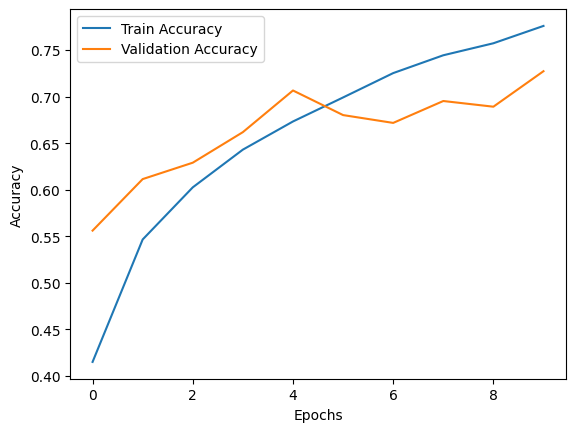

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt

# ✅ Load Your Dataset (Modify as needed)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()  
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# ✅ Define CNN Architecture (Modify based on your paper)
input_layer = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)  # 10 classes for CIFAR-10

model = Model(inputs=input_layer, outputs=output_layer)

# ✅ Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# ✅ Save the Model
model.save("cnn_model.h5")
print("✅ Model Saved Successfully!")

# ✅ Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2%}")

# ✅ Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
model.save("cnn_model.keras")  # Recommended Keras format

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout added to prevent overfitting


Epoch 1/10


C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6126 - loss: 1.1478 - val_accuracy: 0.6848 - val_loss: 0.9786
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6521 - loss: 1.0222 - val_accuracy: 0.7072 - val_loss: 0.8643
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6661 - loss: 0.9733 - val_accuracy: 0.7093 - val_loss: 0.8581
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 900s 576ms/step - accuracy: 0.6736 - loss: 0.9587 - val_accuracy: 0.6878 - val_loss: 0.9373
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.6805 - loss: 0.9322 - val_accuracy: 0.6168 - val_loss: 1.2331
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 910s 582ms/step - accuracy: 0.6865 - loss: 0.9174 - val_accuracy: 0.7306 - val_loss: 0.7877
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.6942 - loss: 0.8935 - val_accuracy: 0.7424 - val_loss: 0.7573
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.7029 - 